<a href="https://colab.research.google.com/github/angeloBuso/EDA_Covid19/blob/master/EDA_Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Imagem" width="100%" src="https://raw.githubusercontent.com/angeloBuso/angeloBuso/main/image/Imagem2-notebook.png">

---

# COVID-19 no Brasil e no Mundo

A Covid-19 é uma infecção respiratória aguda causada pelo coronavírus **SARS-CoV-2**, potencialmente grave, de elevada transmissibilidade e de distribuição global, causada por recém-descoberto coronavírus.

Os coronavírus são uma grande família de vírus comuns em muitas espécies diferentes de animais, incluindo o homem, camelos, gado, gatos e morcegos.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, sendo que a infecção pelo SARS-CoV-2 pode variar de casos assintomáticos e manifestações clínicas leves, até quadros moderados, graves e críticos, sendo necessária atenção especial aos sinais e sintomas que indicam piora do quadro clínico que exijam a hospitalização do paciente

A ciência já evolui muito no combate a este vírus letal, inclusive produzindo anti-virais, que se soma aos esforços no combate desse mal, que assola o século XXI.

<center><img alt="Colaboratory logo" width="100%" src="https://github.com/angeloBuso/EDA_Covid19/blob/master/image/4258090.jpg?raw=true"></center>



## 1. Compreensão Problema de Negócio

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, usando as técnicas de EDA - análise e exploração de dados, iremos obsevar o comportamento, desde de o ínício da pandemia em dez/2019 na China, até os dias atuais.

In [1]:
# importar os pacotes necessarios para projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import os, math
import datetime

## 2. Obtenção dos Dados

No Brasil, ainda há grande dificuldade de obter dados relacionados ao Covid19. Existe um grande embate entre alguns atores no cenário brasileiro.

O conjunto de dados COVID-19, que iremos explorar, é uma coleção dos dados mantidos por [Our World in Data](https://ourworldindata.org/coronavirus). É atualizado diariamente e inclui dados sobre casos confirmados, óbitos, hospitalizações, testes e vacinações, bem como outras variáveis ​​de potencial interesse. Iniciativa desenvolvida pela [Universidade de Oxford](https://www.oxfordmartin.ox.ac.uk/global-development).

Esse repositório de informações de Oxford, encontra no [GitHub](https://github.com/owid/covid-19-data/tree/master/public/data) do projeto.

Para o presente trabalho, importaremos direto do repositório de Oxford, no entanto, caso queira utilizar uma cópia, disponibilizei os dados no meu repositório do [git](https://raw.githubusercontent.com/angeloBuso/EDA_Covid19/master/dataset_Covid19/owid-covid-data.csv).

---
Fonte/Pesquisadores: Max Roser, Hannah Ritchie, Esteban Ortiz-Ospina e Joe Hasell (2020) - "Coronavirus Pandemic (COVID-19)". Publicado online em OurWorldInData.org. Obtido em: https://ourworldindata.org/coronavirus

### 2.1 Carga dos dados
DICA:
* até 3 dimensões PANDAS (1Series, 2DataFrame e 3Panel).
* acima 3 dim NUMPY (nparray)


In [2]:
dados = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

df= pd.read_csv(dados)

### 2.2 Dicionários dados
No intiuto de **conhecer bem seus dados e uma boa-prática**, é a construção de um **dicionário de dados**, que nada mais é do que uma descrição do que cada variável representa.
Os dados que iremos trabalhar possuem 59 variáveis. Entretanto nem todas iremos utilizar.
Sendo assim, disponibilizei uma [planilha](https://github.com/angeloBuso/EDA_Covid19/blob/master/dataset_Covid19/dic_dados.xlsx?raw=true) com as variáveis e seus siginificados.

## 3. Análise Exploratória dos Dados

Visão geral dos dados que iremos analisar. É preciso compreender com o que estamos lidando.

Nesta etapa verificamos:
* (i.) dimensões dos dados.
* (ii.) o que significa cada atributo no contexto dos dados.
* (iii.) os tipos dos dados.
* (iv.) informações que os dados representam.
* (v.) valores ausentes.
* (vi.) informações descritivas dos dados.
* (vii.) variáveis preditoras/ independentes.
* (viii.) variáveis respostas / target.

Sendo essas duas últimas quando iremos realizar um modelo preditivo.

In [3]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,0.051,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 3.1 Visão descritiva do nosso dataSet

Observando algumas informações sobre os dados identificamos quantos atributos/variáveis iremos trabalhar, bem como quantos registros possui nosso conjunto de dados. Uma informação importante é verificar quais os tipos das nossas variáveis, confirmar "informação" que a variável transmite condiz com sua representação. 

In [4]:
def visaogeral(df, message):
    print(f'{message}:\n')
    print("\nQtd Atributos/Variáveis:\t", df.shape[1])
    print("\nQtd Registros/Observações:\t", df.shape[0])
    print("\nEm formato Tabular temos {} colunas e {} linhas."\
          .format(df.shape[1], df.shape[0]))     
    print("\nAtributos:")
    print(df.columns.tolist())
    print("\nQtd Valores missing:", df.isnull().sum().values.sum())
    print("\nValores Únicos (Indicativo de var_Categórica):")
    print(df.nunique())
    print("\nAtributos são do tipo:")
    print(df.dtypes)

In [5]:
visaogeral(df,"Visão Geral do dataSet")

Visão Geral do dataSet:


Qtd Atributos/Variáveis:	 59

Qtd Registros/Observações:	 82488

Em formato Tabular temos 59 colunas e 82488 linhas.

Atributos:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_

Os dados possuem 59 variáveis (ou colunas), cerca de 82.488 registros. Observamos uma grande quantidade de valores faltantes, fato que será investigado melhor mais a frente. Neste dataSet encontramos, quase em toda sua totalidade, valores numéricos. O atributo `date` que representa registros de datas, foi carregado como `object` (variável categórica), devemos transformar esse atributo para a representação de sua informação, ou seja, tranformar para uma vairável do tipo `data`


### Automatizando *insights*
Como forma de ganhar **conciência situacional**, usando a bibliotca `Pandas Profile` geramos um report automatizado, o qual obtemos uma visão geral dos dados finais.

Importante: caso esteja usando o `Colab`, a biblioteca **Pandas Profile** já é nativo do ambiente em nuven da Google, no entanto a versão atual, até o momento da contrução desse trabalho apresentava erro. Como solução, usaremos a versão 2.7.1. `!pip install pandas-profiling==2.7.1 `

Importante ressaltar que o  **Pandas Profile** não substitui uma EDA completa, essa é apenas mais uma ferramenta para nos ajudar nesta tarefa.

In [6]:
# !pip install pandas-profiling==2.7.1 -q
# import pandas_profiling as pp
# from pandas_profiling import ProfileReport
# pp.ProfileReport(df_final)
# report = ProfileReport(df_final)
# report.to_notebook_iframe()

### 3.2 Variáveis Explicativas e Variável Alvo

### 3.3 Investigar os valores ausentes

A qualidade das análises em *Data Science* é proporcional a qualidade do dataSet. Que por sua vez tem relação com a quantidade de registros ausentes.
Valores Missing, como são conhecidos, podem ter naturezas diversas, desde falhas de registros na origem dos dados, até a própria manipulação pelo cientista de dados.
Podemos sugerir algumas hipóteses do que poderia explicar essa ausência e como podemos contorná-la, para continuar explorando o conjunto de dados.
Não existe receita mágica para tratar valores missing, devemos observar o contexto dos dados e aplicar as melhores práticas de imputação.

Neste dataSet da Covid19, observam-se variáveis com quantidade grande de valores missing.

In [7]:
(df.isnull().sum()).sort_values(ascending = False)

weekly_icu_admissions                    81757
weekly_icu_admissions_per_million        81757
weekly_hosp_admissions                   81232
weekly_hosp_admissions_per_million       81232
people_fully_vaccinated                  77294
people_fully_vaccinated_per_hundred      77294
new_vaccinations                         75796
people_vaccinated                        75286
people_vaccinated_per_hundred            75286
total_vaccinations                       74626
total_vaccinations_per_hundred           74626
icu_patients_per_million                 73869
icu_patients                             73869
hosp_patients                            72095
hosp_patients_per_million                72095
new_vaccinations_smoothed_per_million    69982
new_vaccinations_smoothed                69982
total_tests                              45110
total_tests_per_thousand                 45110
new_tests_per_thousand                   44824
new_tests                                44824
handwashing_f

Antes de decidirmos o que fazer em relação aos dados ausentes, vamos verificar a proporção desses *dados missing* em relação à totalidade do dataset.

In [8]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

weekly_icu_admissions                    99.113810
weekly_icu_admissions_per_million        99.113810
weekly_hosp_admissions                   98.477354
weekly_hosp_admissions_per_million       98.477354
people_fully_vaccinated                  93.703327
people_fully_vaccinated_per_hundred      93.703327
new_vaccinations                         91.887305
people_vaccinated                        91.269033
people_vaccinated_per_hundred            91.269033
total_vaccinations                       90.468917
total_vaccinations_per_hundred           90.468917
icu_patients_per_million                 89.551207
icu_patients                             89.551207
hosp_patients                            87.400592
hosp_patients_per_million                87.400592
new_vaccinations_smoothed_per_million    84.839007
new_vaccinations_smoothed                84.839007
total_tests                              54.686742
total_tests_per_thousand                 54.686742
new_tests_per_thousand         

Como dos dados são registros coletados pelos pesquisadores de Oxford do mundo todo, e compreendendo como foi construindo esse banco de dados, concluimos que algumas variáveis foram sendo incluídas ao longo do tempo, ou seja, adicionadas a medida em que o mundo ganhava mais *expertise* sobre o vírus. Ainda, cabe destacar que não são todos os Países que disponibilizam ou disponibilizava as informações.

Na presente análise, não iremos realizar nenhuma *técnica de inputação*, bem como as varíaveis que iremos colocar uma lupa possuem menos que 10% de dados missing's.

### 3.4 Variáveis numéricas 

Cada variável/coluna numérica possui um conjunto de informações, que são seus registros, o que aquela coluna representa. Usando a estatística descritiva e suas ferramentas visuais, conseguimos identificar a forma como estão distribuidos as frequências dos dados em cada atributo numérico. Sendo assim, é possível identificar possíveis *outlier's*, que distorcem a realidade dos dados, valores que tendem a distribuição ao extremo.

In [9]:
# X_num= X.select_dtypes(exclude ='object')

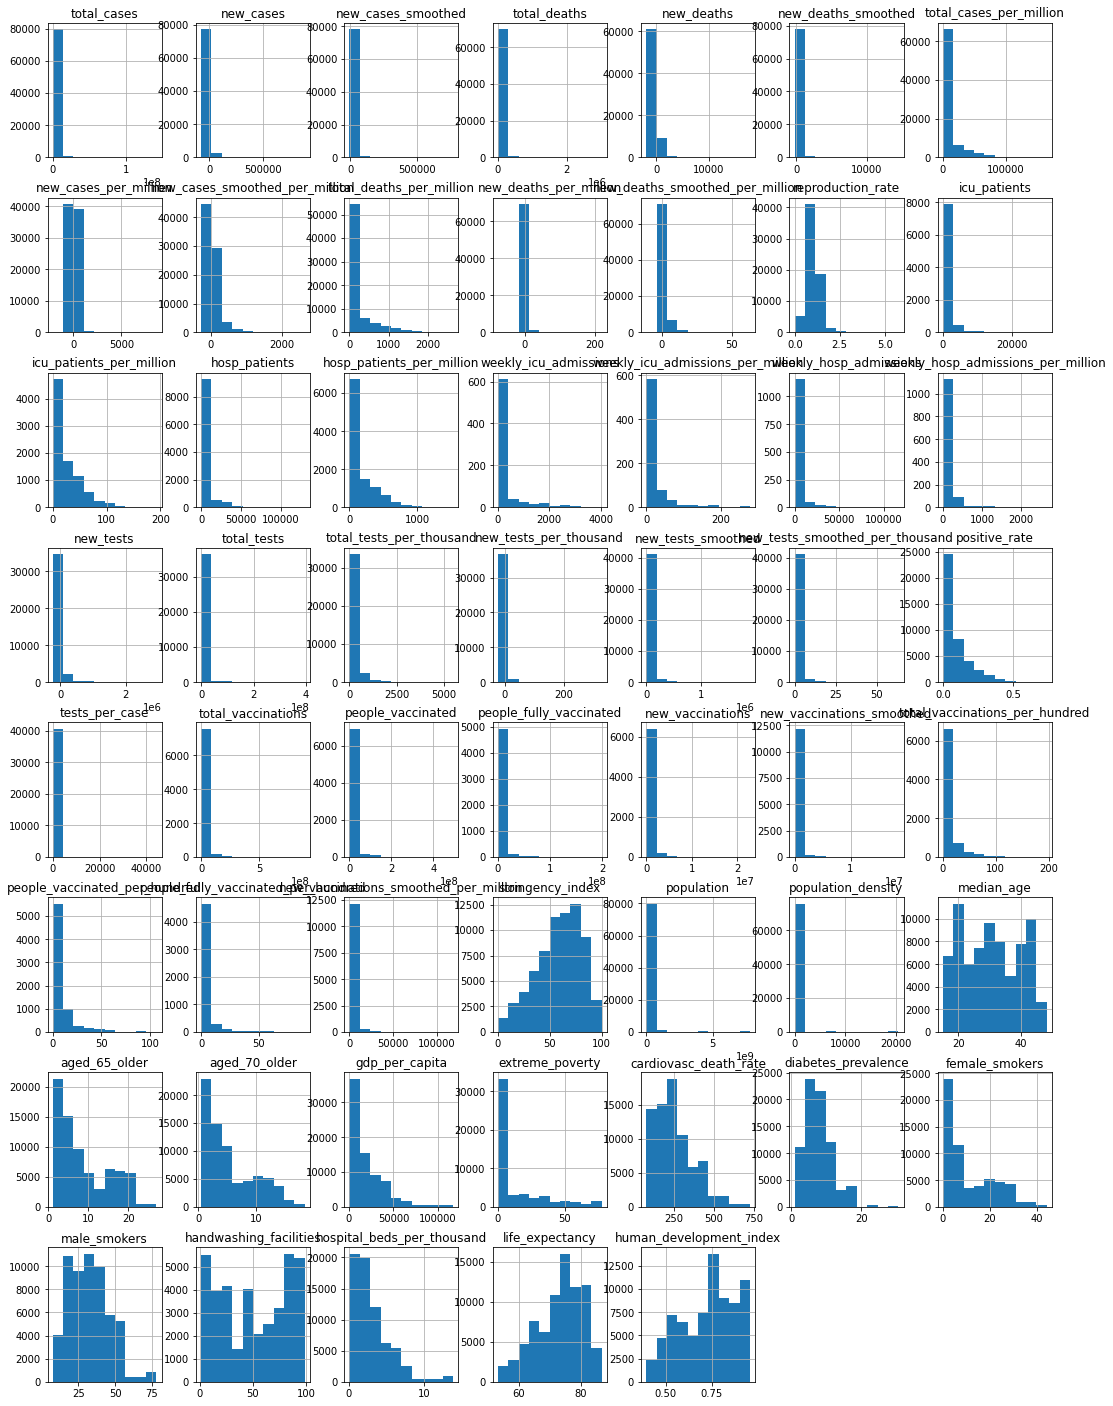

In [10]:
plt.rcParams["figure.figsize"] = (18,25)
df.hist();

Nesse conjunto de histogramas [(para compreender mais sobre o que é um histograma)](https://pt.khanacademy.org/math/statistics-probability/displaying-describing-data/quantitative-data-graphs/a/histograms-review) de forma inicial, podemos compreender algumas informações de todo nosso conjunto de dados, como exemplo, a variável `life_expectancy`, que indica a expectativa de vida, para **todo conjunto** de dados, concentra-se em torno de 75 anos. 

Com o dicionário de dados em mãos, compreendendo como foram construidos as informações, conseguimos tirar informações valiosas..... que é um dos **grandes objetivos** da Ciência de Dados.

#### 3.3.2 Relação atributos numéricos

Visualizar como duas variáveis se relaciona é um ótimo exercício de compreender nossos dados, bem como uma excelente ferramenta de obter *insights* e olhar os dados por outra perspectiva.

-> **Importante** a relação entre as variáveis **NÃO SÃO CONCLUSIVAS** por si só. Indica apenas um caminho que deve ser melhor investigado!!!

Vamos visualizar a relação entre total de mortes com o nível de PIB Percapita das informações. 

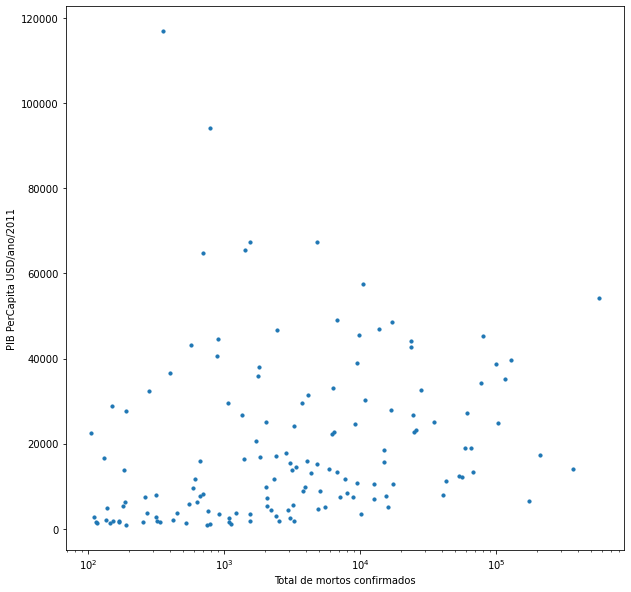

In [11]:
plt.rcParams["figure.figsize"] = (10,10)
df.loc[(df.date == '2021-04-15') & (df.total_deaths > 100), ['location','total_deaths', 'gdp_per_capita']].\
sort_values(by= 'total_deaths', ascending= False)[5:].\
plot.scatter(x= 'total_deaths', y= 'gdp_per_capita', s= 10)
plt.ylabel('PIB PerCapita USD/ano/2011')
plt.xlabel('Total de mortos confirmados')
#plt.axhline(y='20000',
 #           color= 'coral',
 #           linestyle= '--',
 #           linewidth= 0.5)

plt.xscale('log')

Cabe algumas considerações neste gráfico. A variável `gdp_per_capita` é o  PIB (Produto Interno Bruto) de cada país, dividido pela população daquela nação, de forma anualizada e em dólares internacionais constantes de 2011 - ano mais recente disponível.

Ou seja, para os Estados Unidos o PIB per capito em 2011 foi de USD 54.225,44 (dólares), ao passo que o PIB per capito em 2011 no Brasil foi de USD 14.103,45 (dólares).

Obsevarmos que, **com dos dados de PIB/anual/USD em 2011**, há uma incidência maior de números de mortos em países em que o PIB per capito é abaixo de USD 20.000,00 (dólares).

### 3.5 Variáveis categóricas
Usa-se tabelas de frequencias para representar tais atributos.
DICA-> usar `groupby` e `aggregate` do pandas, para facilitar na construção desses visuais.

## 4. Pré Processamento dos dados
Muitos algoritmos esperam receber os dados em um formato específico. É nosso trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que estamos utilizando.

É muito provável que tennhamos que realizar tarefas de pré-processamento nos dados. Esse é um passo **necessário** dentro do processo. O desafio é **cada algoritmo requer uma estrutura diferente**, o que pode requerer transformações diferentes nos dados. Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento.

Uma boa prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning.

* (i) fazemos **decomposição** - dividir uma variável que está com informação agrupadas em 2 ou mais variáveis.
* (ii) **escala** - colocamos dados na mesma escala, entre 0 e 1.
* (iii) **agregação** - agrupamos informações, seja por contagem de instâncias, seja por group-by de variáveis.
* (iv) aplicamos **reshape** nos dados, se necessário.

### 4.1 Transformação de atributos

#### 4.1.1 Atribuindo formato dataTime

Atributos que possuem informação temporal (dia, hora, mês, ano, etc), quando estamos trabalhando com a biblioteca `Pandas`, uma boa prática é transformar o tipo da informação para um formato `DateTime`. Com essa transformação ganhamos poder de manipulação desse atributo.

Notamos que o formato original dos atributos `date` está como `object`, uma string. Nesse formato original que carregou-se os dados para o colab, obtemos pouco poder de manipulação.

In [12]:
df.date

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
82483    2021-04-14
82484    2021-04-15
82485    2021-04-16
82486    2021-04-17
82487    2021-04-18
Name: date, Length: 82488, dtype: object

In [13]:
df['date']= pd.to_datetime(df['date'], format= "%Y-%m-%d")
df.date

0       2020-02-24
1       2020-02-25
2       2020-02-26
3       2020-02-27
4       2020-02-28
           ...    
82483   2021-04-14
82484   2021-04-15
82485   2021-04-16
82486   2021-04-17
82487   2021-04-18
Name: date, Length: 82488, dtype: datetime64[ns]

In [14]:
df.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   82488
unique                    474
top       2021-03-18 00:00:00
freq                      215
first     2020-01-01 00:00:00
last      2021-04-18 00:00:00
Name: date, dtype: object

Observamos que nossos dados possuem registros de 01/01/2020 até 18/04/2021.


---


Faremos um recorte com a data mais recente nos dados, no sentido de iniciar as análises propostas no início desse projeto!!

In [15]:
data_EDA = format(max(df.date.dt.date))

Identificação dos paises com os **maiores casos acumulados** confirmados, desde o início da Pandemia.

In [16]:
df.loc[df['date']== data_EDA].sort_values(by= 'total_cases',
                                              ascending = False).head(11)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
81321,OWID_WRL,NaN,World,2021-04-18,141404998.0,685495.0,765481.429,3019330.0,8603.0,11839.429,18140.943,87.943,98.204,387.352,1.104,1.519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737
25445,OWID_EUR,NaN,Europe,2021-04-18,43093965.0,112683.0,171319.143,977779.0,2177.0,3481.857,57559.920,150.509,228.828,1306.004,2.908,4.651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54699,OWID_NAM,NaN,North America,2021-04-18,36636567.0,55153.0,85176.714,832594.0,523.0,1286.000,61878.546,93.152,143.862,1406.237,0.883,2.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4307,OWID_ASI,NaN,Asia,2021-04-18,33818604.0,414773.0,368236.857,467217.0,3177.0,2684.714,7288.732,89.394,79.364,100.697,0.685,0.579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78644,USA,North America,United States,2021-04-18,31670031.0,42018.0,67450.571,567217.0,313.0,723.000,95679.087,126.942,203.777,1713.633,0.946,2.184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35055.0,105.905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
25897,OWID_EUN,NaN,European Union,2021-04-18,29358117.0,86165.0,136356.429,661284.0,1408.0,2475.429,65985.299,193.664,306.475,1486.302,3.165,5.564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68930,OWID_SAM,NaN,South America,2021-04-18,23381531.0,93152.0,128910.143,622800.0,2467.0,4071.143,54279.746,216.250,299.262,1445.817,5.727,9.451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34325,IND,Asia,India,2021-04-18,15061805.0,273802.0,219155.429,178769.0,1619.0,1227.143,10914.317,198.407,158.808,129.542,1.173,0.889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66,0.645
10982,BRA,South America,Brazil,2021-04-18,13943071.0,42980.0,65864.000,373335.0,1657.0,2885.429,65596.113,202.202,309.862,1756.380,7.795,13.575,NaN,Na

Identificação dos países com as **maiores mortes acumuladas**, desde o início da Pandemia.

In [17]:
df.loc[df.date == data_EDA].sort_values(by= 'total_deaths',
                                            ascending= False).head(11)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
81321,OWID_WRL,NaN,World,2021-04-18,141404998.0,685495.0,765481.429,3019330.0,8603.0,11839.429,18140.943,87.943,98.204,387.352,1.104,1.519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
25445,OWID_EUR,NaN,Europe,2021-04-18,43093965.0,112683.0,171319.143,977779.0,2177.0,3481.857,57559.920,150.509,228.828,1306.004,2.908,4.651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54699,OWID_NAM,NaN,North America,2021-04-18,36636567.0,55153.0,85176.714,832594.0,523.0,1286.000,61878.546,93.152,143.862,1406.237,0.883,2.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25897,OWID_EUN,NaN,European Union,2021-04-18,29358117.0,86165.0,136356.429,661284.0,1408.0,2475.429,65985.299,193.664,306.475,1486.302,3.165,5.564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68930,OWID_SAM,NaN,South America,2021-04-18,23381531.0,93152.0,128910.143,622800.0,2467.0,4071.143,54279.746,216.250,299.262,1445.817,5.727,9.451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78644,USA,North America,United States,2021-04-18,31670031.0,42018.0,67450.571,567217.0,313.0,723.000,95679.087,126.942,203.777,1713.633,0.946,2.184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35055.0,105.905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
4307,OWID_ASI,NaN,Asia,2021-04-18,33818604.0,414773.0,368236.857,467217.0,3177.0,2684.714,7288.732,89.394,79.364,100.697,0.685,0.579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10982,BRA,South America,Brazil,2021-04-18,13943071.0,42980.0,65864.000,373335.0,1657.0,2885.429,65596.113,202.202,309.862,1756.380,7.795,13.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.765
48372,MEX,North America,Mexico,2021-04-18,2305602.0,1506.0,3627.000,212339.0,111.0,428.714,17882.206,11.681,28.131,1646.897,0.861,3.325,NaN,Na

Nota-se que os dados, possuem a informação agrupada também por continentes. O atibuto `iso_code` é com base na Organização Internacional para Padronização.

Como o objetivo é entender o comportamento e a progressão da doença nos países iremos excluir as informações que tratam do agrupamento por continente.

#### 4.1.2 Obtendo dados com informações necessárias

In [18]:
# a. obtendo apenas iso_code de paises, excluindo continentes agrupados no iso_code
excluir= ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_EUN', 'OWID_INT', 'OWID_KOS', 
          'OWID_NAM', 'OWID_CYN', 'OWID_OCE', 'OWID_SAM']

# b. obtendo os indices das informações a serem excluidas
index_excluir= df.loc[df.iso_code.isin(excluir)].index

# c. atribuindo um novo objeto, excluido o que não desejamos
df_paises = df.drop(index_excluir, axis= 0)
df_paises.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
82483,ZWE,Africa,Zimbabwe,2021-04-14,37369.0,39.0,55.000,1548.0,5.0,2.429,2514.242,2.624,3.700,104.152,0.336,0.163,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2375.0,462372.0,31.109,0.16,1873.0,0.126,0.029,34.1,tests performed,262128.0,231632.0,30496.0,13773.0,11816.0,1.76,1.56,0.21,795.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82484,ZWE,Africa,Zimbabwe,2021-04-15,37422.0,53.0,52.857,1550.0,2.0,2.571,2517.808,3.566,3.556,104.286,0.135,0.173,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285881.0,252932.0,32949.0,23753.0,13172.0,1.92,1.70,0.22,886.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82485,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,2525.344,7.536,3.720,104.354,0.067,0.154,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304701.0,269732.0,34969.0,18820.0,14071.0,2.05,1.81,0.24,947.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82486,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,2536.445,11.101,4.095,104.421,0.067,0.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82487,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,2539.944,3.499,4.450,104.488,0.067,0.144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


## 5. EDA - Exploratory Data Analysis



### 5.1 Paises com maiores incidências de casos confirmados

Como podemos observar, com base nos dados catalogados do projeto mantido pela *Oxford University*, até a data de 18/04/2021 no **Mundo** registrou-se um pouco mais de 141 milhões de infectados com o vírus.

Infelizmente o Brasil figura-se entre as 5 nações que mais registraram casos acumulados de infecção deste novo corona vírus.

In [19]:
df_paises.loc[df['date'] == data_EDA,
              ['iso_code','location', 'total_cases', 'date']].\
sort_values(by= 'total_cases', ascending= False).head(6)

,iso_code,location,total_cases,date
81321,OWID_WRL,World,141404998.0,2021-04-18
78644,USA,United States,31670031.0,2021-04-18
34325,IND,India,15061805.0,2021-04-18
10982,BRA,Brazil,13943071.0,2021-04-18
27376,FRA,France,5350521.0,2021-04-18
61557,RUS,Russia,4649044.0,2021-04-18


### 5.2 Paises com maiores registros de mortes pelo vírus

O vírus possui uma letalidade elevada, como podemos observar nos dados de mortalidade registrados no mundo, bem como nos países. De acordo como os dados da Oxford University, até 18/04/2021 um pouco mais de 3 milhões de pessoas perderam a batalha para o vírus. E nesta triste realidade o Brasil é o segundo país neste ranking de óbitos pelo vírus.

In [20]:
df_paises.loc[df.date == data_EDA,
              ['iso_code','location', 'total_deaths', 'date']].\
sort_values(by= 'total_deaths', ascending= False).head(6)

,iso_code,location,total_deaths,date
81321,OWID_WRL,World,3019330.0,2021-04-18
78644,USA,United States,567217.0,2021-04-18
10982,BRA,Brazil,373335.0,2021-04-18
48372,MEX,Mexico,212339.0,2021-04-18
34325,IND,India,178769.0,2021-04-18
78191,GBR,United Kingdom,127518.0,2021-04-18


#### 5.2.1 Letalidade do vírus

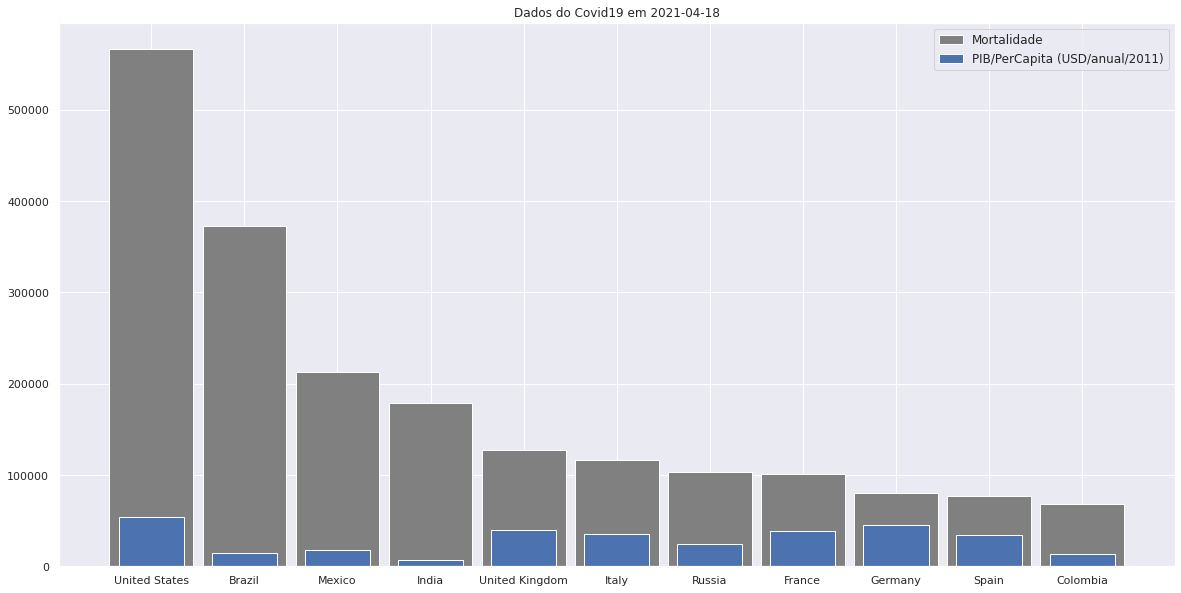

In [21]:
mortalidade = df_paises.loc[df_paises.date == data_EDA,
                            ['location', 'total_deaths','gdp_per_capita']].\
                            sort_values(by= 'total_deaths',
                                        ascending= False)[1:12]
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
ax.bar('location', 'total_deaths', width= 0.9, data= mortalidade,
       color= 'gray', label= "Mortalidade")
ax.bar('location', 'gdp_per_capita', width= 0.7, data= mortalidade,
       label= "PIB/PerCapita (USD/anual/2011)")
ax.set_title("Dados do Covid19 em {}".format(max(df_paises.date.dt.date)))
ax.legend(fontsize= 12)

plt.savefig('mortalidade.png', format='png', dpi=80, bbox_inches='tight')

plt.tight_layout;

O Brasil posiciona na segunda coloção em números de mortes, desde o início da série de dados (01/01/2020 à 18/02/2021), acumula cerca de 373 mil brasileiros mortos. O país que ocupa a infeliz primeira colocação é os Estados Unidos, com cerca de 567 mil norte-americanos mortos. A terceira colocação, em número de mortes é do México, cerca de 212 mil mortos. Índia e Reino Unido estão em quarto e quinto, neste terrível ranking, com cerca de 178 mil e 127 mil mortes respectivamente.

Quando plotamos as informações do PIB Per Capita de cada país, lembrando que as informações desse atributo `gdp_per_capita` refere-se ao ano de 2011, anualizado e em dólares, o PIB perCapito norte-americano foi de USS 54.225,44 ao passo que o brasileiro foi de USS 14.103,45.

Se considerarmos que o PIB poderia ser uma espécie de poder de recuperação das nações frente as adversidades, enquanto o número de mortes do segundo colocado [BRA] representa cerca de 66% do primeiro colocado [EUA], o PIB per capita brasileiro, representa apenas cerca de 26% do norte-americano. O que enseja em um poder maior de recuperação dos EUA, frente aos outros. Ou seja, a medida que encostarmos em números de mortes dos norte-americanos, não teremos o mesmo poder de reação equivalente.



In [22]:
mortalidade

,location,total_deaths,gdp_per_capita
78644,United States,567217.0,54225.446
10982,Brazil,373335.0,14103.452
48372,Mexico,212339.0,17336.469
34325,India,178769.0,6426.674
78191,United Kingdom,127518.0,39753.244
37390,Italy,116927.0,35220.084
61557,Russia,103834.0,24765.954
27376,France,100892.0,38605.671
29041,Germany,80052.0,45229.245
70206,Spain,76981.0,34272.360


### 5.3 Progressão Vírus no Mundo

Desde o ínicio da proliferação do vírus a todos continentes, pouco se sabia como proceder para conter o contágio rápido da doença. Por ser um vírus que a transmissão se dá por vias aéreas, sugeriram que as nações realizassem *lockdown* dos indivíduos e assim evitar a transmissão que se dá principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, somado ao fato da gravidade dos sintomas variar muito de pessoa para pessoa.

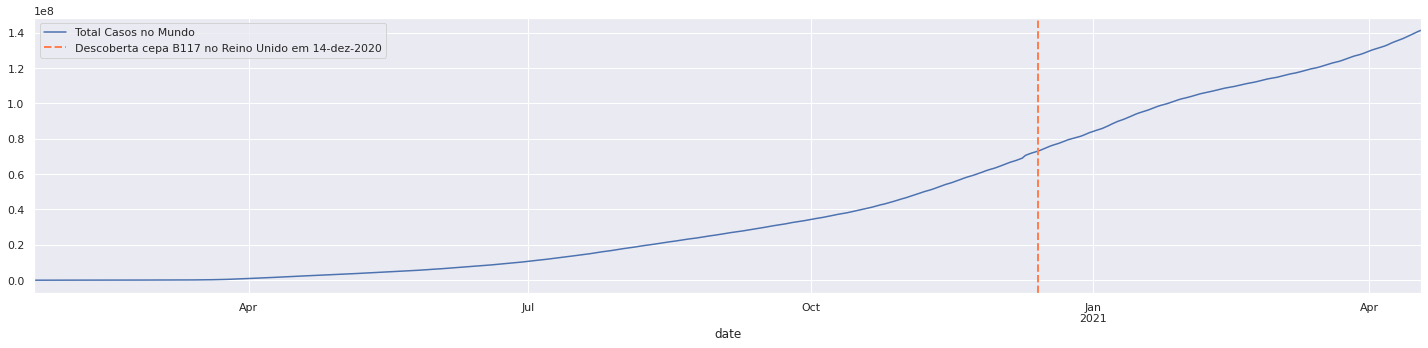

In [23]:
fig, ax = plt.subplots(figsize= (20,5))
df_paises.loc[df_paises.location == 'World',
              ['date', 'total_cases']].plot(x= 'date',
                                            y= 'total_cases',
                                            kind= 'line',
                                            label= 'Total Casos no Mundo',
                                            ax= ax)
#plt.title('Total Casos no Mundo')
plt.axvline(x='2020-12-14', ymin= 0, ymax= 1,
            label= 'Descoberta cepa B117 no Reino Unido em 14-dez-2020',
            color= 'coral',
            linestyle= '--',
            linewidth= 2)
plt.legend()
plt.tight_layout()


Plotando a progressão dos casos confirmados no mundo, desde o início da pandemia, percebemos uma tendêncis crescente.

Há um ponto em que a elevação da curva se mostra ascedente. Esse ponto pode ter relação com a descoberta de uma mutação do vírus em dezembro/2020 no Reino Unido. Pesquisadores identificaram que essa variante é mais contagiosa, o que aumentou nossa preocupação.


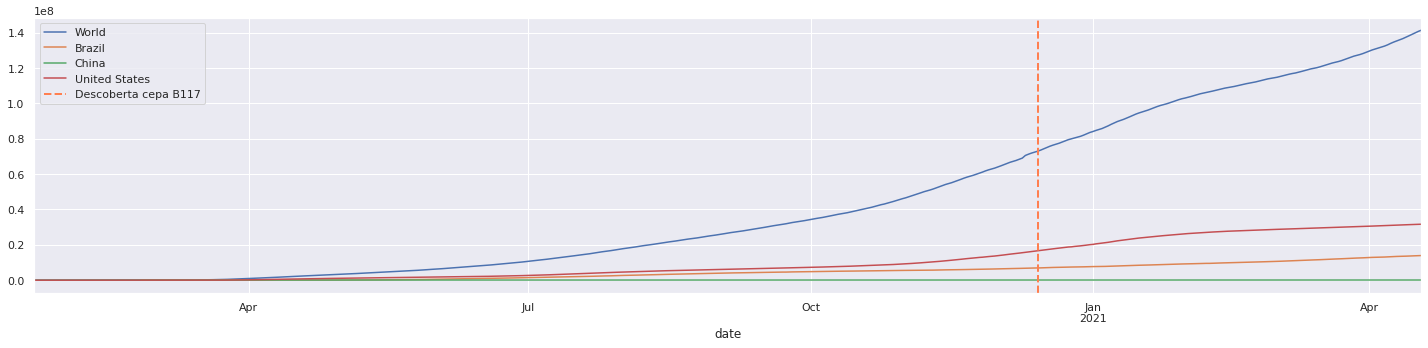

In [24]:
sns.set_theme(style= "darkgrid")

fig, ax= plt.subplots(figsize=(20,5))

df_paises.loc[df_paises.location == 'World'].plot(x= 'date',
                                                  y= 'total_cases',
                                                  kind= 'line',
                                                  label= 'Total Casos no Mundo',
                                                  ax=ax)
df_paises.loc[df_paises.location == 'Brazil'].plot(x= 'date',
                                                   y= 'total_cases',
                                                   kind= 'line',
                                                   ax=ax,
                                                   label= 'Brazil')
df_paises.loc[df_paises.location == 'China'].plot(x= 'date',
                                                  y= 'total_cases',
                                                  kind= 'line',
                                                  ax=ax,
                                                  label= 'China')
#df_paises.loc[df_paises.location == 'India'].plot(kind= 'line', ax=ax)
#df_paises.loc[df_paises.location == 'France'].plot(kind= 'line', ax=ax)
#df_paises.loc[df_paises.location == 'Russia'].plot(kind= 'line', ax=ax)
df_paises.loc[df_paises.location == 'United States'].plot(x= 'date',
                                                          y= 'total_cases',
                                                          kind= 'line',
                                                          ax=ax,
                                                          label= 'United States')

#ticks = [str(10**i) for i in np.arange(0, 9)]
#plt.yticks(ticks, rotation=45)
#plt.xticks(np.arange(len(df_paises.index)), labels= df_paises.index)

plt.axvline(x='2020-12-14', ymin= 0, ymax= 1,
            #label= 'Descoberta cepa B117 no Reino Unido em 14-dez-2020',
            color= 'coral',
            linestyle= '--',
            linewidth= 2)

plt.legend(['World', 'Brazil', 'China', 'United States', 'Descoberta cepa B117'])
plt.tight_layout()

### 5.4 Monitoramento dos países

Identificar a têndencia no movimento do vírus, nos países que mais registraram ocorrências, auxiliam-nos em meios de identificar se as medidas de contenção da doença adotada por esses páises, estão surtindo os resultados desejados.


####5.4.1 Casos Confirmados

In [25]:
paises_top5casos = df_paises.loc[df.date == data_EDA,
              ['iso_code','location', 'total_cases', 'date']].\
sort_values(by= 'total_cases', ascending= False).head(6).location.unique()
paises_top5casos = np.append(paises_top5casos, 'China')
paises_top5casos

array(['World', 'United States', 'India', 'Brazil', 'France', 'Russia',
       'China'], dtype=object)

In [26]:
casos_world= df_paises.loc[df_paises.location.isin(paises_top5casos),
                    ['date', 'total_cases', 'location']].reset_index(drop=True)
casos_world.index= casos_world.date
casos_world.drop(labels= 'date', axis= 1, inplace= True)
casos_world

,total_cases,location
date,,
2020-02-26,1.0,Brazil
2020-02-27,1.0,Brazil
2020-02-28,1.0,Brazil
2020-02-29,2.0,Brazil
2020-03-01,2.0,Brazil
...,...,...
2021-04-14,138259845.0,World
2021-04-15,139076606.0,World
2021-04-16,139931461.0,World


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

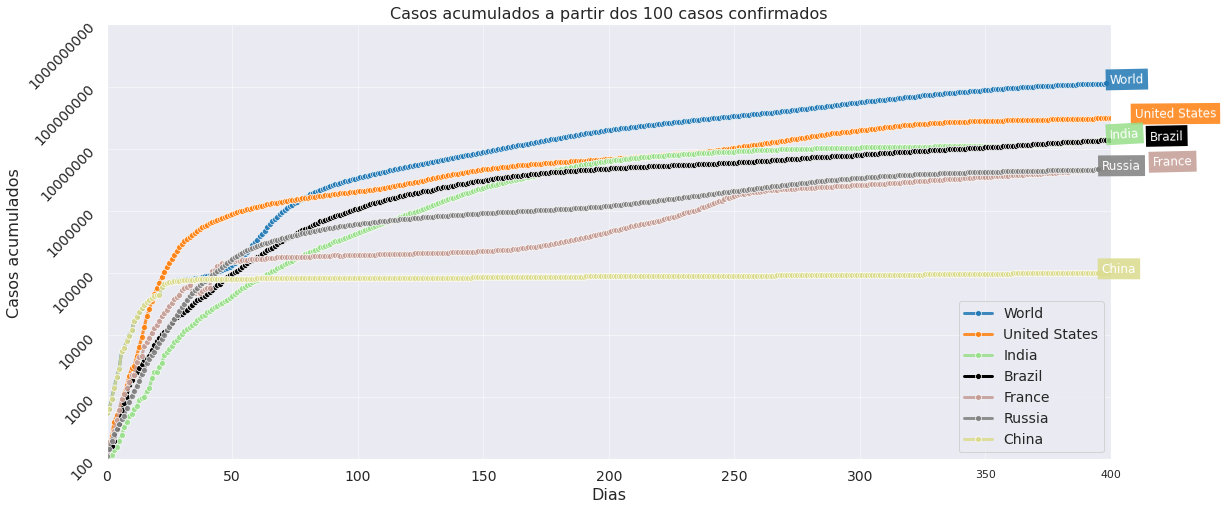

In [27]:
def plot_log(title, xlim, ylim, inicio, countries, colors): 
  
  plt.close('all')
  valores = {}
  plt.figure(figsize=(18, 8))
  styles = ['dashed', 'solid', 'dotted', 'solid', 'dashdot']
 
  n = -1
  for k, country in enumerate(countries):
    # dicionario -> captura de cada "country" KEY, seus valores VALUE.
    valores[country] = [t for t in casos_world.total_cases.loc[casos_world.location == country] if t > inicio]
    if len(valores[country]) == 0: continue
    if country == 'China':
      n = xlim
    if country == 'World':
      n = xlim
    else:
      n = -1
    # posição dos "lables" dos países
      # Local do ultimo ponto
    y = len(valores[country][:n]) -0.1
      # Altura do último ponto de dado
    altura = np.log10(valores[country][:n])[-1]
    alpha = 0.85
    # ajuste de altura do nome pais
    if country == 'France': y += 4.12
    if country == 'China': y -= 55.12
    if country == 'Brazil': 
      altura += 0.0
      y += 15.00
      alpha = 1
      colors[country] = [0, 0, 0, 1]

    # plot (X,Y)  
    p = sns.lineplot(np.arange(len(valores[country][:n-1])),
                     np.log10(valores[country][:n-1]),
                     label=country, linewidth=3, color=colors[country],
                     alpha=alpha, marker='o', linestyle='solid')
    color = p.get_lines()[-1].get_color()

    # label paises
    dy = np.log10(valores[country][-2]) - np.log10(valores[country][-8]) 
    rot = max(0, math.atan2(dy,7))  * (180/math.pi) * 10
    t = plt.text(y-0.5, altura, country , fontsize=12, rotation=rot,color='w',alpha=1.,
                 bbox=dict(facecolor=color, edgecolor='none', alpha=alpha))

  # eixos
  plt.xticks(fontsize=14)
  ticks = [str(10**i) for i in np.arange(0, ylim+1)]
  plt.yticks(np.arange(0, ylim+1), ticks, fontsize=14, rotation=46)
  plt.xlim(0, xlim)
  ylim_lower = max(0, np.floor(np.log10(inicio)) )
  plt.ylim(ylim_lower,ylim)

  # titulos
  plt.xlabel('Dias', fontsize= 16)
  plt.ylabel(title + ' acumulados', fontsize=16)  
  plt.title(title + ' acumulados a partir dos ' + str(inicio) + ' casos confirmados', fontsize=16)
  plt.grid(True, alpha=0.5)
  plt.legend(fontsize=14, loc=4)
  
  plt.savefig(title+'.png', format='png', dpi=150, bbox_inches='tight')
  plt.show()

countries_confirmed = paises_top5casos
#deaths_confirmed = paises_top5mortes

# paleta cores aleatorias
colors = pl.cm.tab20(np.linspace(0,1,len(countries_confirmed)+1))
color_dict = {}
for k, country in enumerate(countries_confirmed):
  color_dict[country] = colors[k]

plot_log('Casos', 400, 9, 100, countries_confirmed, color_dict)

Desde o início dessa Pandemia Mundial, jan/2020, houve um crescimento elevado de casos confirmados, até meados do quinquagésimo dia. Reflexo da falta de conhecimento e informações deste novo tipo de corona vírus. A medida que pesquisadores e cientistas foram ganhando mais conhecimento a cerca do vírus, nota-se uma redução na força dessa elevação de casos de infeccção.

No entanto, o gráfico sugere uma caminho de elevação, ao passo que a China mostra uma manutenção na proliferação de novos casos da Covid19.

####5.4.2 Mortalidades Registradas

In [28]:
paises_top5mortes = df_paises.loc[df.date == data_EDA,
              ['iso_code','location', 'total_deaths', 'date']].\
sort_values(by= 'total_deaths', ascending= False).head(6).location.unique()
paises_top5mortes = np.append(paises_top5mortes, 'China')
paises_top5mortes

array(['World', 'United States', 'Brazil', 'Mexico', 'India',
       'United Kingdom', 'China'], dtype=object)

In [29]:
morte_world= df_paises.loc[df_paises.location.isin(paises_top5mortes),
                           ['date', 'total_deaths', 'location']].reset_index(drop=True)
morte_world.index= morte_world.date
morte_world.drop(labels= 'date', axis= 1, inplace= True)
morte_world

,total_deaths,location
date,,
2020-02-26,NaN,Brazil
2020-02-27,NaN,Brazil
2020-02-28,NaN,Brazil
2020-02-29,NaN,Brazil
2020-03-01,NaN,Brazil
...,...,...
2021-04-14,2972617.0,World
2021-04-15,2985817.0,World
2021-04-16,2998717.0,World


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

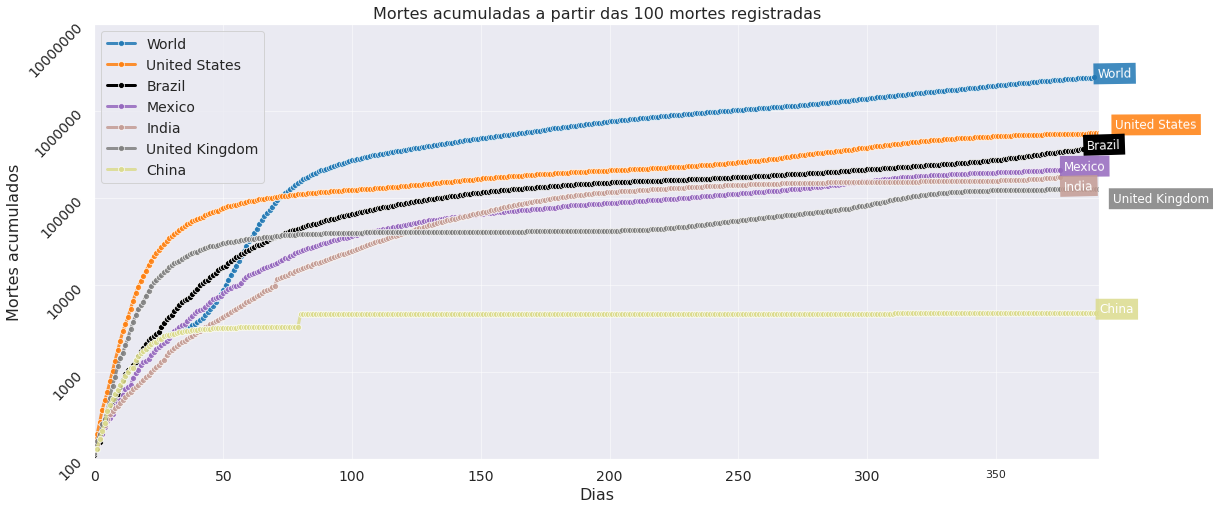

In [30]:
def plot_log(title, xlim, ylim, inicio, countries, colors): 
  
  plt.close('all')
  valores = {}
  plt.figure(figsize=(18, 8))
  styles = ['dashed', 'solid', 'dotted', 'solid', 'dashdot']
 
  n = -1
  for k, country in enumerate(countries):
    # dicionario -> captura de cada "country" KEY, seus valores VALUE.
    valores[country] = [t for t in morte_world.total_deaths.loc[morte_world.location == country] if t > inicio]
    if len(valores[country]) == 0: continue
    if country == 'China':
      n = xlim
    if country == 'World':
      n = xlim
    else:
      n = -1
    # posição dos "lables" dos países
      # Local do ultimo ponto
    y = len(valores[country][:n]) -0.1
      # Altura do último ponto de dado
    altura = np.log10(valores[country][:n])[-1]
    alpha = 0.85
    # ajuste de altura do nome pais
    if country == 'United States':
      altura += 0.05
      y += 0.00
    if country == 'United Kingdom':
      altura -= 0.15
      y += 0.00
    if country == 'India':
      altura -= 0.15
      y += 0.00
    if country == 'China': y -= 55.12
    if country == 'Brazil': 
      altura += 0.0
      y += 0.00
      alpha = 1
      colors[country] = [0, 0, 0, 1]

    # plot (X,Y)  
    p = sns.lineplot(np.arange(len(valores[country][:n-1])),
                     np.log10(valores[country][:n-1]),
                     label=country, linewidth=3, color=colors[country],
                     alpha=alpha, marker='o', linestyle='solid')
    color = p.get_lines()[-1].get_color()

    # label paises
    dy = np.log10(valores[country][-2]) - np.log10(valores[country][-8]) 
    rot = max(0, math.atan2(dy,7))  * (180/math.pi) * 10
    t = plt.text(y-0.5, altura, country , fontsize=12, rotation=rot,color='w',alpha=1.,
                 bbox=dict(facecolor=color, edgecolor='none', alpha=alpha))

  # eixos
  plt.xticks(fontsize=14)
  ticks = [str(10**i) for i in np.arange(0, ylim+1)]
  plt.yticks(np.arange(0, ylim+1), ticks, fontsize=14, rotation=46)
  plt.xlim(0, xlim)
  ylim_lower = max(0, np.floor(np.log10(inicio)) )
  plt.ylim(ylim_lower,ylim)

  # titulos
  plt.xlabel('Dias', fontsize= 16)
  plt.ylabel(title + ' acumulados', fontsize=16)  
  plt.title(title + ' acumuladas a partir das ' + str(inicio) + ' mortes registradas', fontsize=16)
  plt.grid(True, alpha=0.5)
  plt.legend(fontsize=14, loc=0)
  
  plt.savefig(title+'.png', format='png', dpi=150, bbox_inches='tight')
  plt.show()

countries_confirmed = paises_top5casos
deaths_confirmed = paises_top5mortes

# paleta cores aleatorias
colors = pl.cm.tab20(np.linspace(0,1,len(deaths_confirmed)+1))
color_dict = {}
for k, country in enumerate(deaths_confirmed):
  color_dict[country] = colors[k]

plot_log('Mortes', 390, 7, 100, deaths_confirmed, color_dict)

O mesmo movimento observado nos "casos confirmados", notamos na quantidade de óbitos registradas nos 5 países com maiores registros. 

No entanto, um ponto merece nossa atenção. A curva que representa o Brasil há uma têndencia de elevação, o que nos deixa mais alertas com o cenário futuro dessa doença no nosso país.

In [31]:
estados = 26
distrito_federal = 1
municipios = 5568

caminhos = estados + distrito_federal + municipios
print('Agindo de forma individualizadas temos', caminhos, 'caminhos diferentes.')

Agindo de forma individualizadas temos 5595 caminhos diferentes.


## 6. Conclusões

Todo processo de análise em *Data Science* as conclusões são únicas, pois reflete aos dados no contexto do problema de negócio apontado no início do projeto.

Um detalhe importante a ser destacado é que este dataSet que utilizamos, os dados são medidos diariamente, o que enseja em sua desatualização rápida.

A batalha contra essa doença e este vírus é um dever de todos. Já temos anti-virais para auxiliar neste combate, no entanto há ocorrências de mutações do vírus na medida que aumenta a proliferação da doença.

No Brasil, vemos que tanto a proliferação do vírus como o número de mortes está em crescimento. E tais números coloca nosso país nesses infelizes top-five de estatísticas da doença. 

O fato é, temos que ter um ponto de inflexão e mudar esse cenário. O que vemos é cada um pensando **dentro de sua própria caixinha**. Ao fazer isso abrimos espaço para se ter 5.595 caminhos descentralizados para o combate dessa doença. E ter essa quantidade de caminhos pode ser perigoso, e até as vezes um caminho sem volta.

Meu objetivo aqui não foi causar mais pânico.... isso por si só o vírus já tem causado. Mais propor que pensamos fora da caixa!!!




---

